This data is from the NYtimes Github Repository
I intend to analyze the Covid 19 historical data from the United States, for it's counties
I hope to find and report insights

In [18]:
# This cell where I import all modules
import pandas as pd # For data analyis
from collections import defaultdict # Defaultdict is a sub-class of the dict class 
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2

I'll be analzing the Covid 19 reports of all US counties

In [2]:
# Reading the historical data reported by the NYtimes
# for the US
covidUSCountryData = pd.read_csv(
    'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
covidUSCountryData.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


NYtimes reports two types of dataset; historical and live. "A key difference between the historical and live files is that the numbers in the historical files are the final counts at the end of each day, while the live files have figures that may be a partial count released during the day but cannot necessarily be considered the final, end-of-day tally.."

- cases: The total number of cases of Covid-19, including both confirmed and probable.
- deaths: The total number of deaths from Covid-19, including both confirmed and probable.
- confirmed_cases: The number of laboratory confirmed Covid-19 cases only, or blank if not available.
- confirmed_deaths: The number of laboratory confirmed Covid-19 deaths only, or blank if not available.
- probable_cases: The number of probable Covid-19 cases only, or blank if not available.
- probable_deaths: The number of probable Covid-19 deaths only, or blank if not available.
- FIPS codes: These are numbers which uniquely identify geographic areas. The number of digits in FIPS codes vary 
depending on the level of geography. State-level FIPS codes have two digits, county-level FIPS codes have five
digits of which the first two are the FIPS code of the state to which the county belong

In [3]:
# Understanding the shape of the data
covidUSCountryData.shape

(118, 3)

It has 150,169 rows and 6 columns

In [4]:
covidUSCountryData.columns

Index(['date', 'cases', 'deaths'], dtype='object')

In [5]:
# Let me have an idea of the numerical and categorical data types
covidUSCountryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    118 non-null    object
 1   cases   118 non-null    int64 
 2   deaths  118 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


I'm thinking I should convert the date column to a datetime format, 
Then go ahead to make it the datasets index. That way I can analyze the data like time series data

The result reveals a total of 3009 entries in the dataset. Generally, the columns tied with data type “int64” and “float64” denotes numerical data while data type “object” denotes categorical data.

My experience from reading articles and learning data science; I'll like to find out the central tendency of this live dataset.

Mean is an average of all the numbers. The steps required to calculate a mean are: sum up all the values of a target variable in the datasetthe sum by the number of values

Note of warning: a mean might be influenced by the outliers.

Outliers are the numbers which are either extremely high or extremely low compared to the rest of the numbers in a dataset.

Median is the middle value of a sorted list of numbers. The steps required to get a median from a list of numbers are: sort the numbers from smallest to highest if the list has an odd number of values, the value in the middle position is the median if the list has an even number of values, the average of the two values in the middle will be the median

Note: A median is not influenced by the outliers.

In [6]:
# Calculating the mean of cases and deaths respectively
mean_cases = covidUSCountryData['cases'].mean()

In [7]:
# Average reported cases for the US counties
print("Average Reported Cases:", mean_cases)

Average Reported Cases: 363776.0338983051


In [8]:
# Calculating the mean of deaths
mean_deaths = covidUSCountryData['deaths'].mean()

In [9]:
# Average reported deaths for US counties
print("Average Reported Deaths:", mean_deaths)

Average Reported Deaths: 19756.084745762713


In [10]:
# Calculating the Median reported cases
median_cases = covidUSCountryData['cases'].median()

In [11]:
# Median of the reported cases
print("Median Reported cases:",median_cases)

Median Reported cases: 15197.0


In [12]:
# Calculating the Median deaths 
median_deaths = covidUSCountryData['deaths'].median()

In [13]:
# Median of deaths
print("Median of Reported Deaths:", median_deaths)

Median of Reported Deaths: 243.5


Measuring Variation

I digress in this notebook. I needed to test my hands on something I am currently learning. I will save this part
of the notebook. Learning can be cross sectional...I made that shit up

So at this point I was reading Think Stats by Allen Downey, so I decided to play around with histograms

In [14]:
covidUSCountryData

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
113,2020-05-13,1397780,84104
114,2020-05-14,1424734,85842
115,2020-05-15,1450963,87435
116,2020-05-16,1474612,88660


In [15]:
covidUSCountryData.columns

Index(['date', 'cases', 'deaths'], dtype='object')

In [22]:
cases_covid = covidUSCountryData[covidUSCountryData.cases > 200]
cases_covid

,date,cases,deaths
44,2020-03-05,228,12
45,2020-03-06,311,15
46,2020-03-07,428,19
47,2020-03-08,547,22
48,2020-03-09,748,26
...,...,...,...
113,2020-05-13,1397780,84104
114,2020-05-14,1424734,85842
115,2020-05-15,1450963,87435
116,2020-05-16,1474612,88660


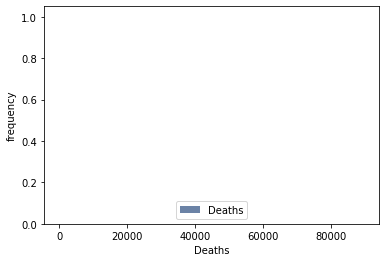

<Figure size 576x432 with 0 Axes>

In [23]:
hist = thinkstats2.Hist(cases_covid.deaths, label = 'Deaths' )
thinkplot.hist(hist)
thinkplot.Show(xlabel ='Deaths', ylabel ='frequency')